## MC method

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load boundary conditions

In [2]:
def load_bc(path):
    return np.array(pd.read_csv(path, header=None, dtype='float32')).T

In [3]:
box_bc = load_bc('../boundaries/box_boundary_condition.csv')
windmill_bc = load_bc('../boundaries/windmill_boundary_condition.csv')

Plot the heatmap

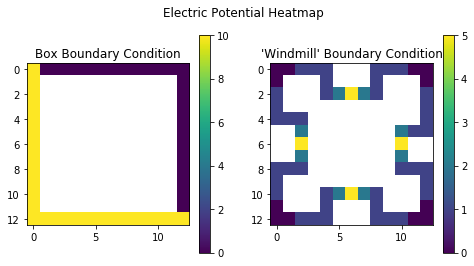

In [4]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
fig.suptitle('Electric Potential Heatmap')

ax[0].set_title('Box Boundary Condition')
box_map = ax[0].imshow(box_bc.T)
ax[0].figure.colorbar(box_map, ax=ax[0])

ax[1].set_title('\'Windmill\' Boundary Condition')
windmill_map = ax[1].imshow(windmill_bc.T)
ax[1].figure.colorbar(windmill_map, ax=ax[1])

plt.show()

MC sampling

In [5]:
def sample_V(X, boundary, save_trajectory=False):
    step_choices = [(0,1), (0,-1), (1,0), (-1,0)]
    if save_trajectory:
        Xt = [X]
    while str(boundary[X[0]][X[1]]) == 'nan':
        X = X + step_choices[np.random.choice(range(4))]
        if save_trajectory:
            Xt.append(X)
    if save_trajectory:
        return boundary[X[0]][X[1]], Xt
    else:
        return boundary[X[0]][X[1]]

In [6]:
np.random.seed(12345)
Vs = []
Xts = []
X_start = np.array([2,10])
for i in range(50):
    V, Xt = sample_V(X_start, box_bc, True)
    Vs.append(V)
    Xts.append(Xt)
print(np.mean(Vs))

9.0


You have print :0 graph. You still have : 0 graph. 
None
You have print :1 graph. You still have : 1 graph. 
None
You have print :2 graph. You still have : 2 graph. 
None
You have print :3 graph. You still have : 3 graph. 
None
You have print :4 graph. You still have : 4 graph. 
None
You have print :5 graph. You still have : 5 graph. 
None
You have print :6 graph. You still have : 6 graph. 
None
You have print :7 graph. You still have : 7 graph. 
None
You have print :8 graph. You still have : 8 graph. 
None
You have print :9 graph. You still have : 9 graph. 
None
You have print :10 graph. You still have : 10 graph. 
None
You have print :11 graph. You still have : 11 graph. 
None
You have print :12 graph. You still have : 12 graph. 
None
You have print :13 graph. You still have : 13 graph. 
None
You have print :14 graph. You still have : 14 graph. 
None
You have print :15 graph. You still have : 15 graph. 
None
You have print :16 graph. You still have : 16 graph. 
None
You have print :1

C:\Users\daris\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


You have print :20 graph. You still have : 20 graph. 
None
You have print :21 graph. You still have : 21 graph. 
None
You have print :22 graph. You still have : 22 graph. 
None
You have print :23 graph. You still have : 23 graph. 
None
You have print :24 graph. You still have : 24 graph. 
None


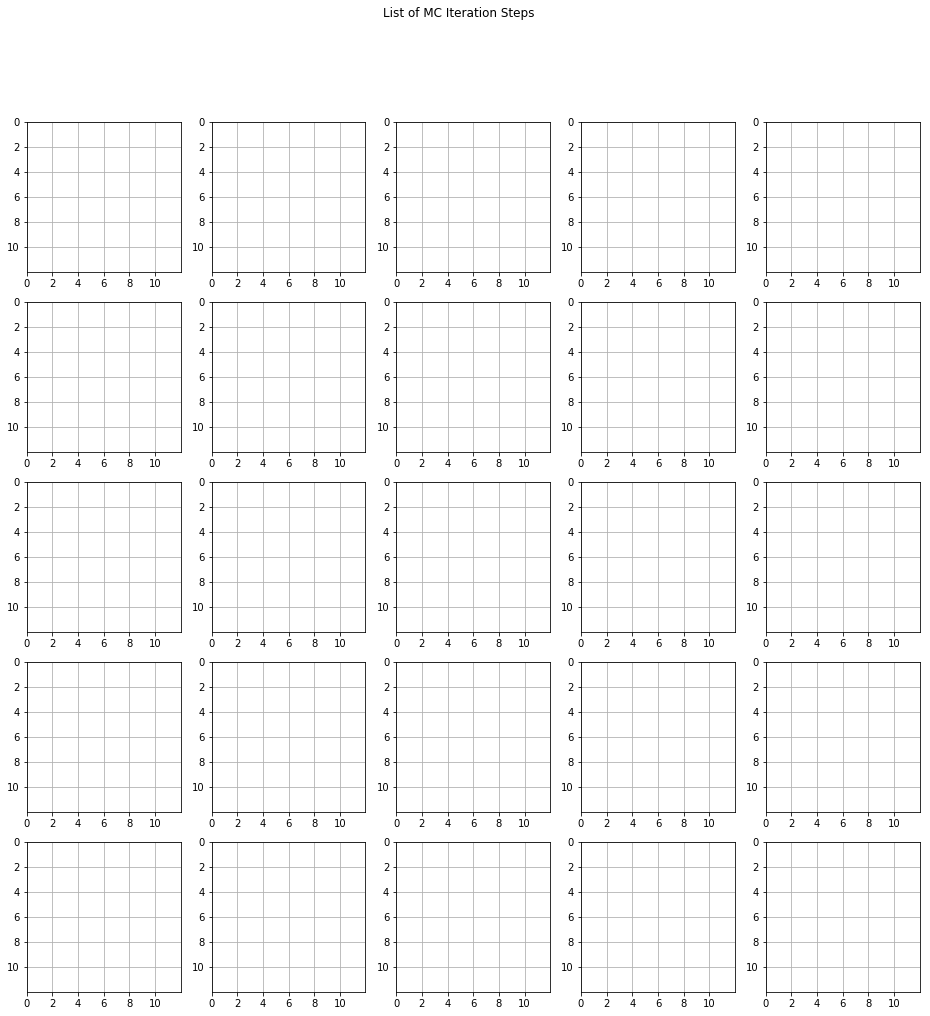

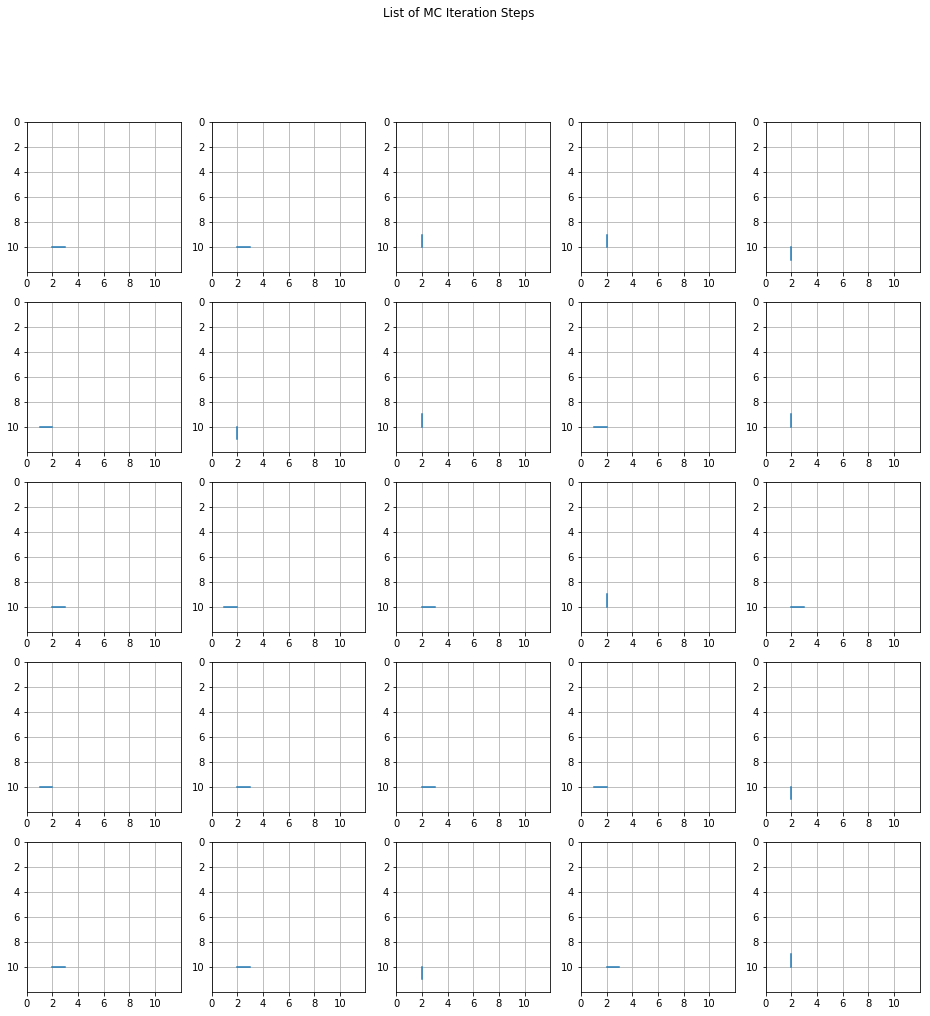

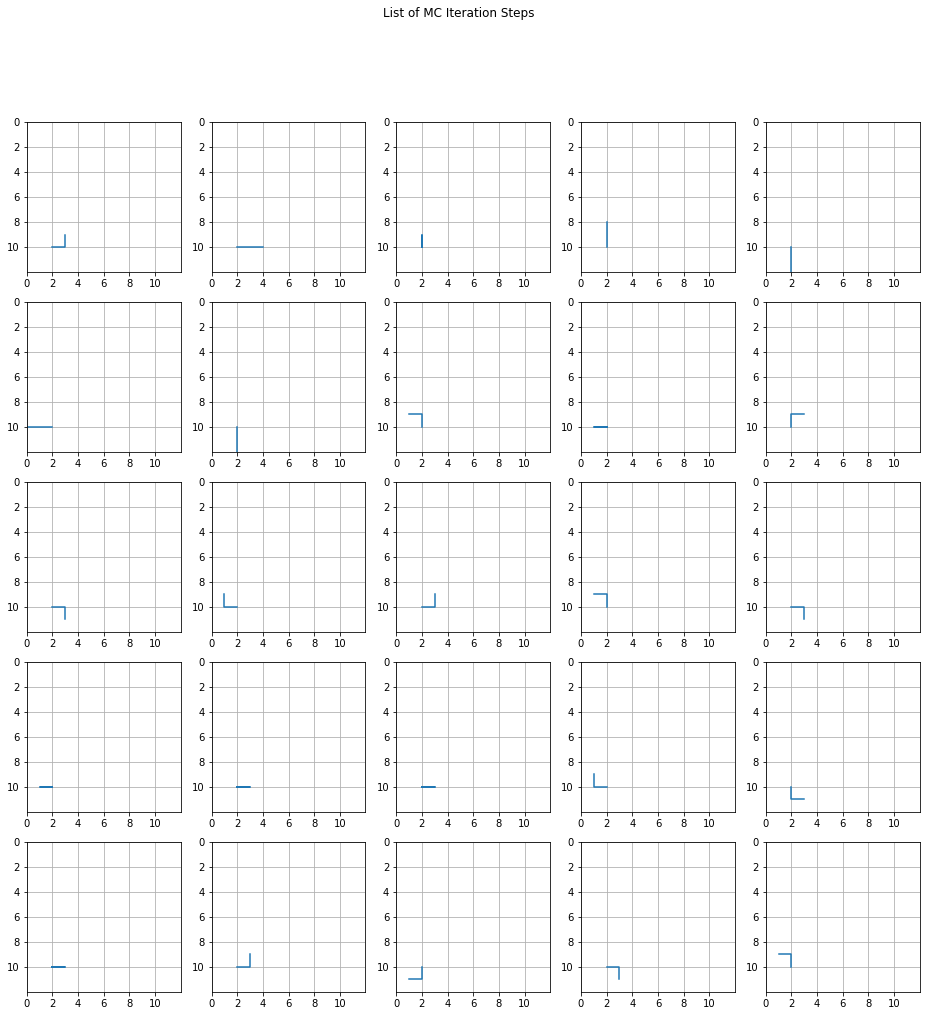

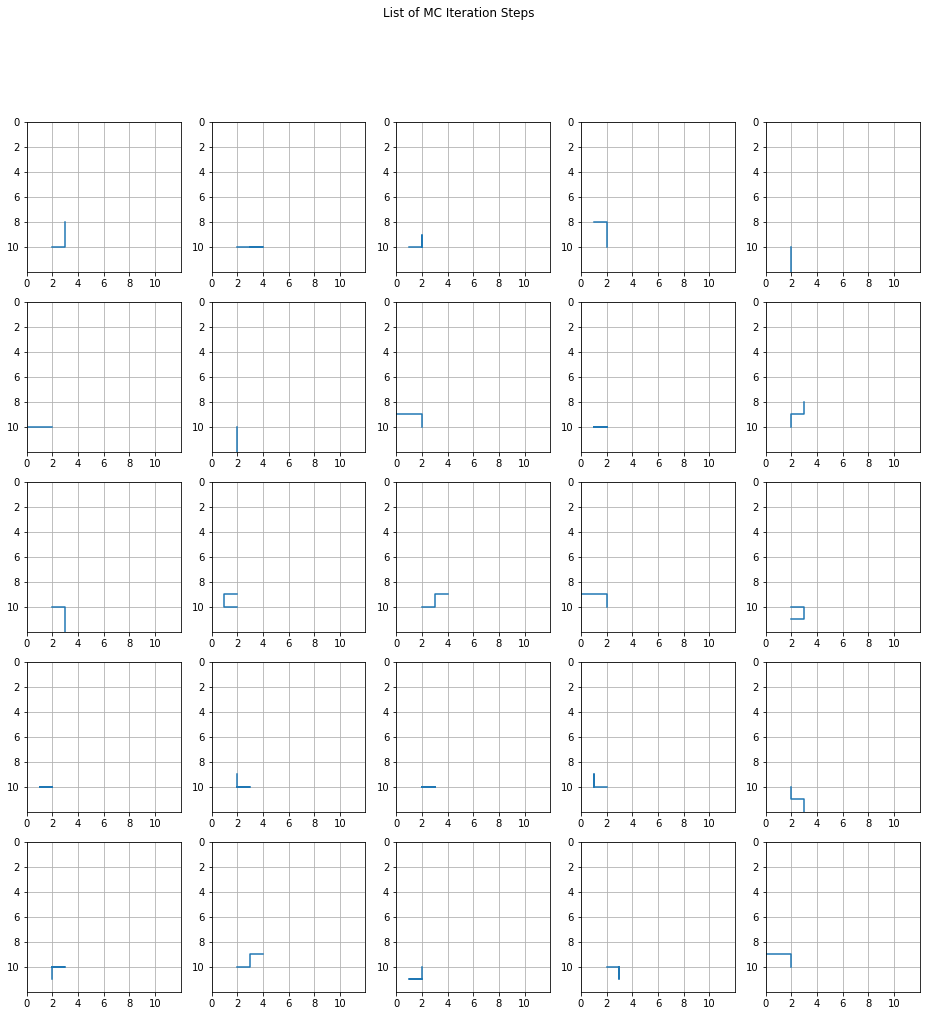

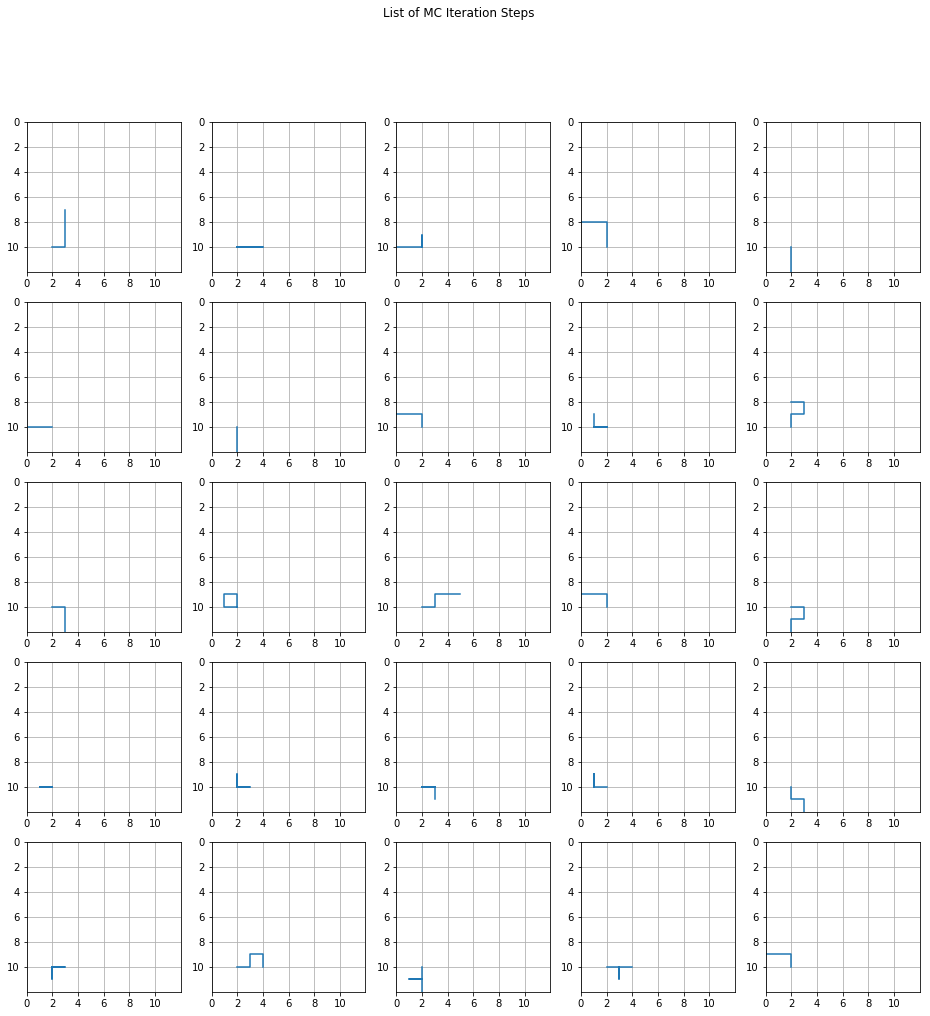

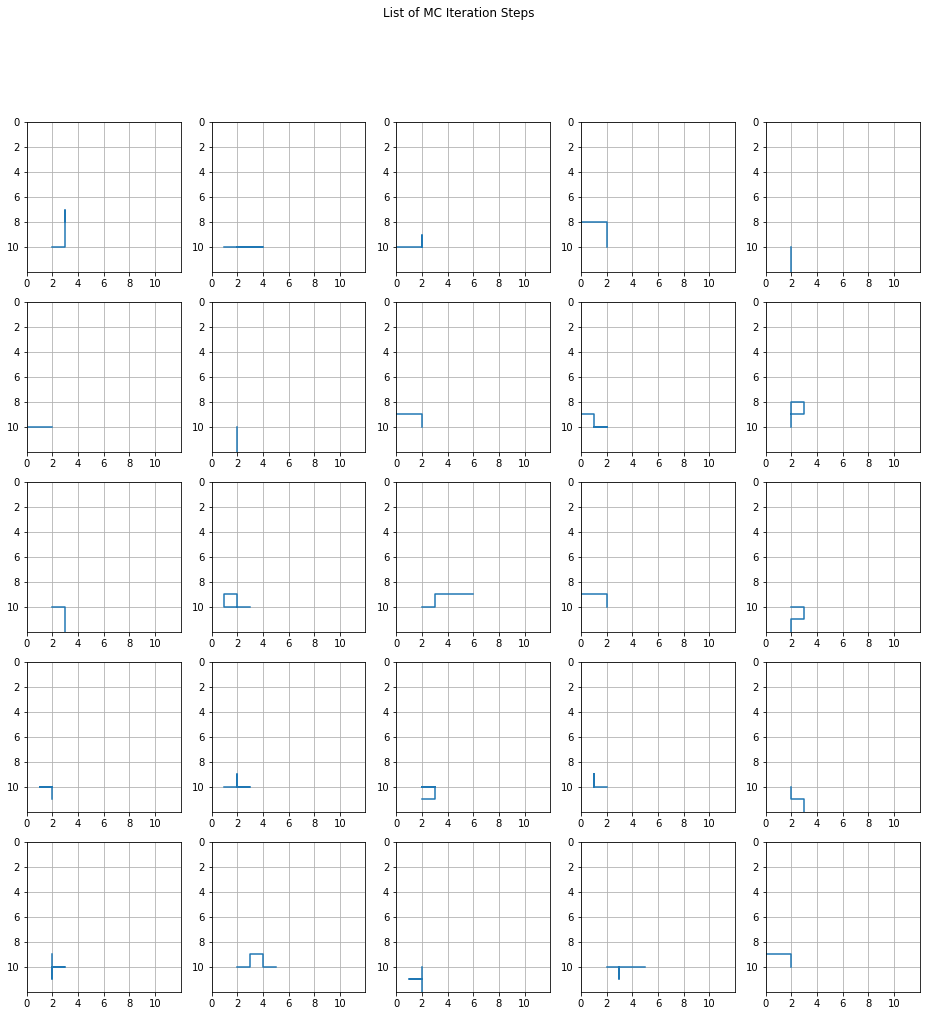

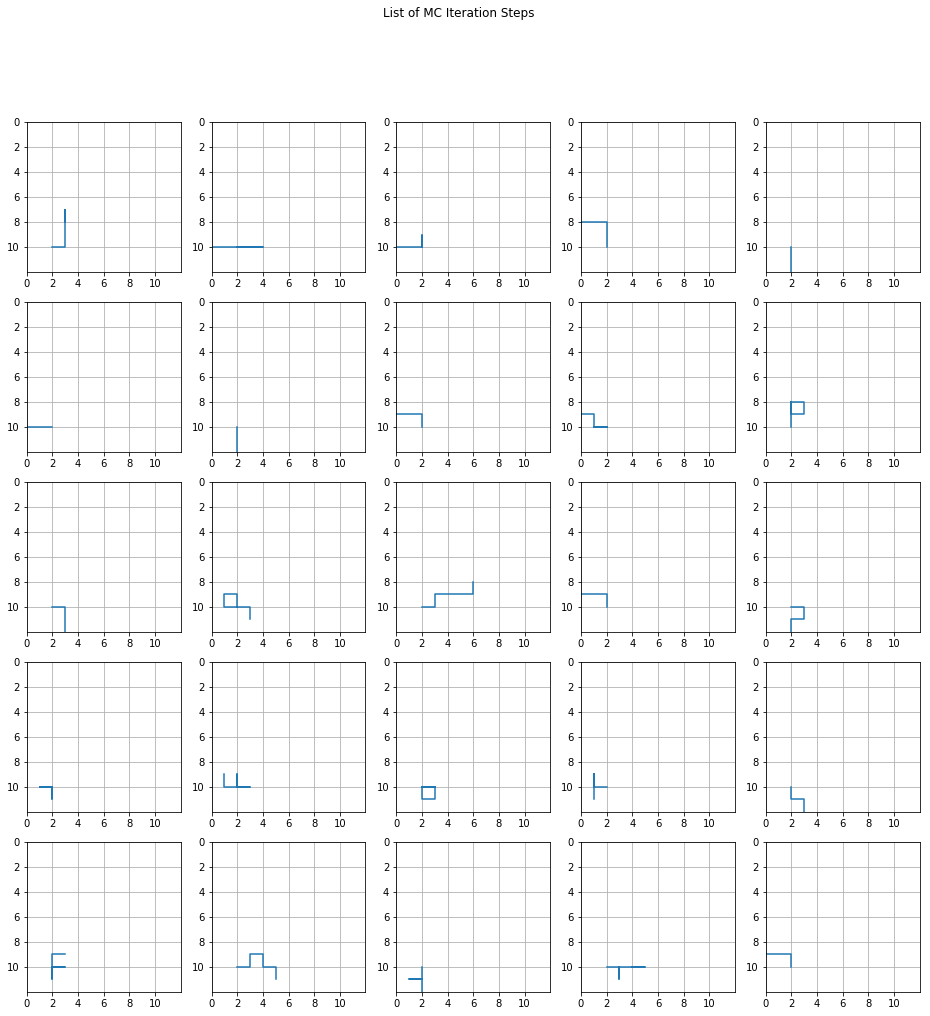

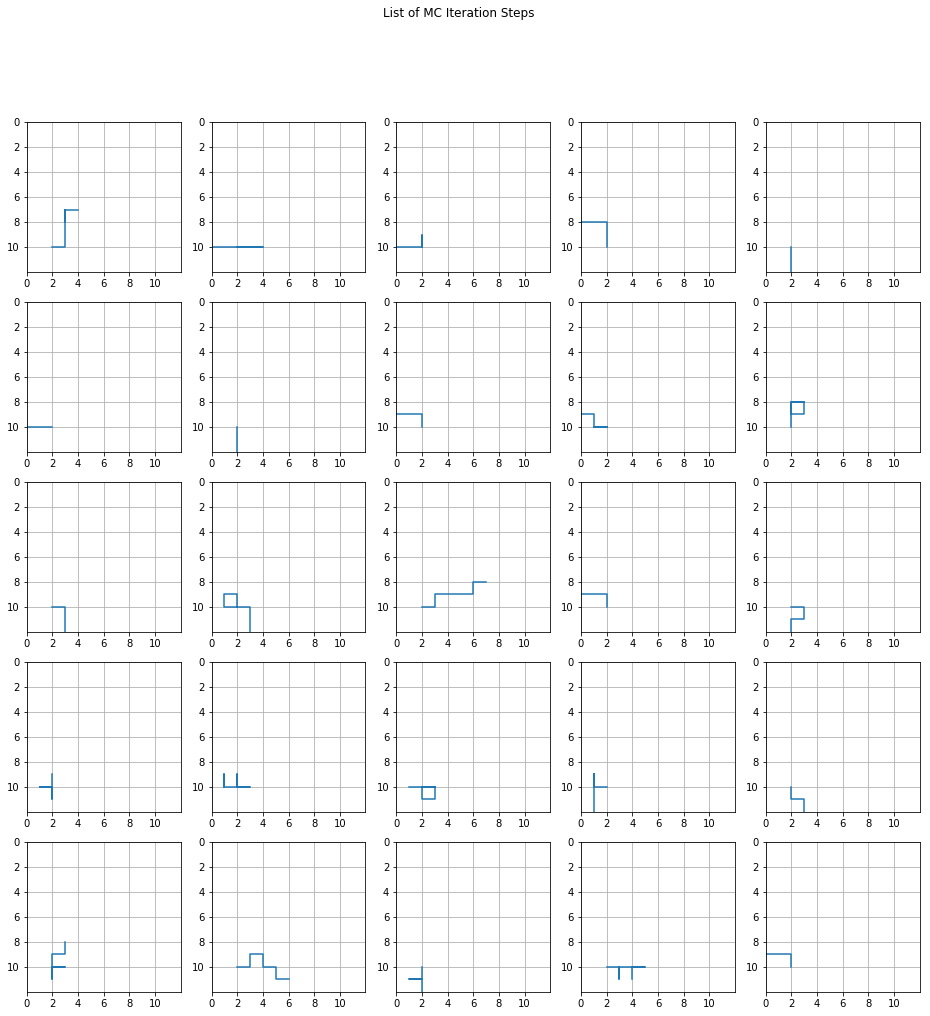

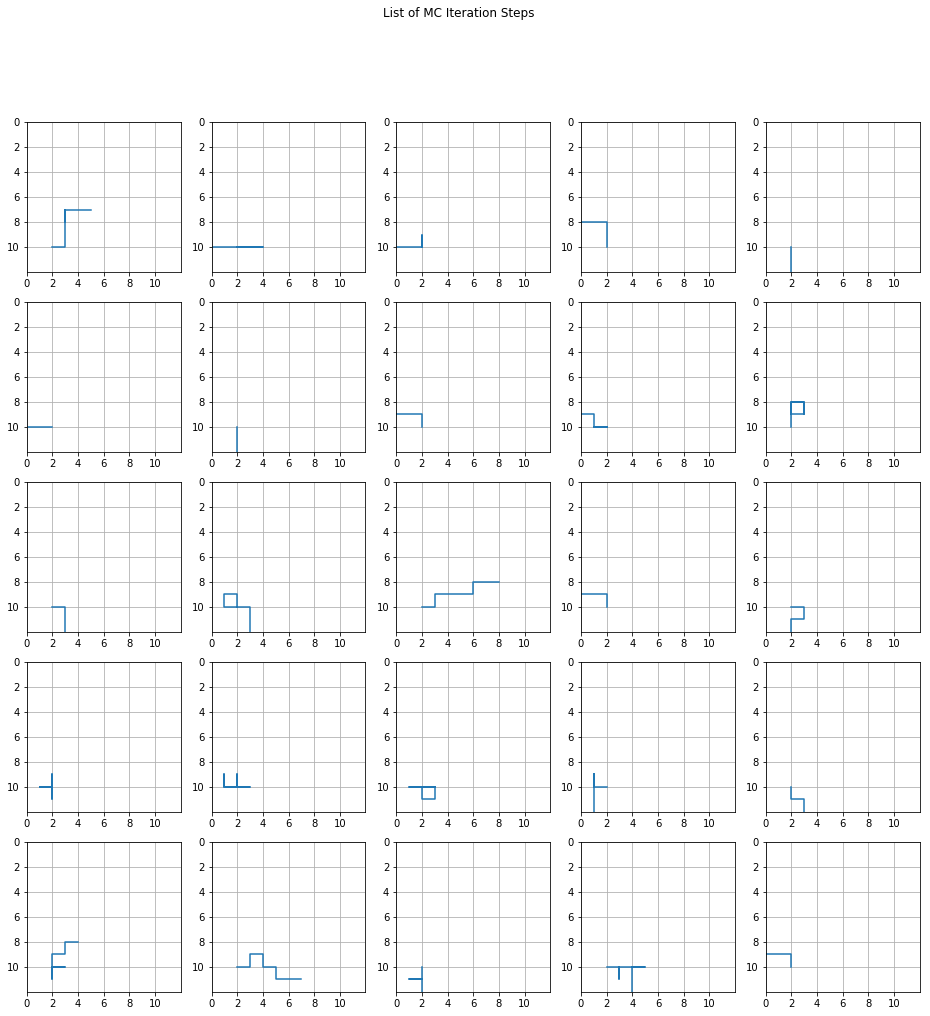

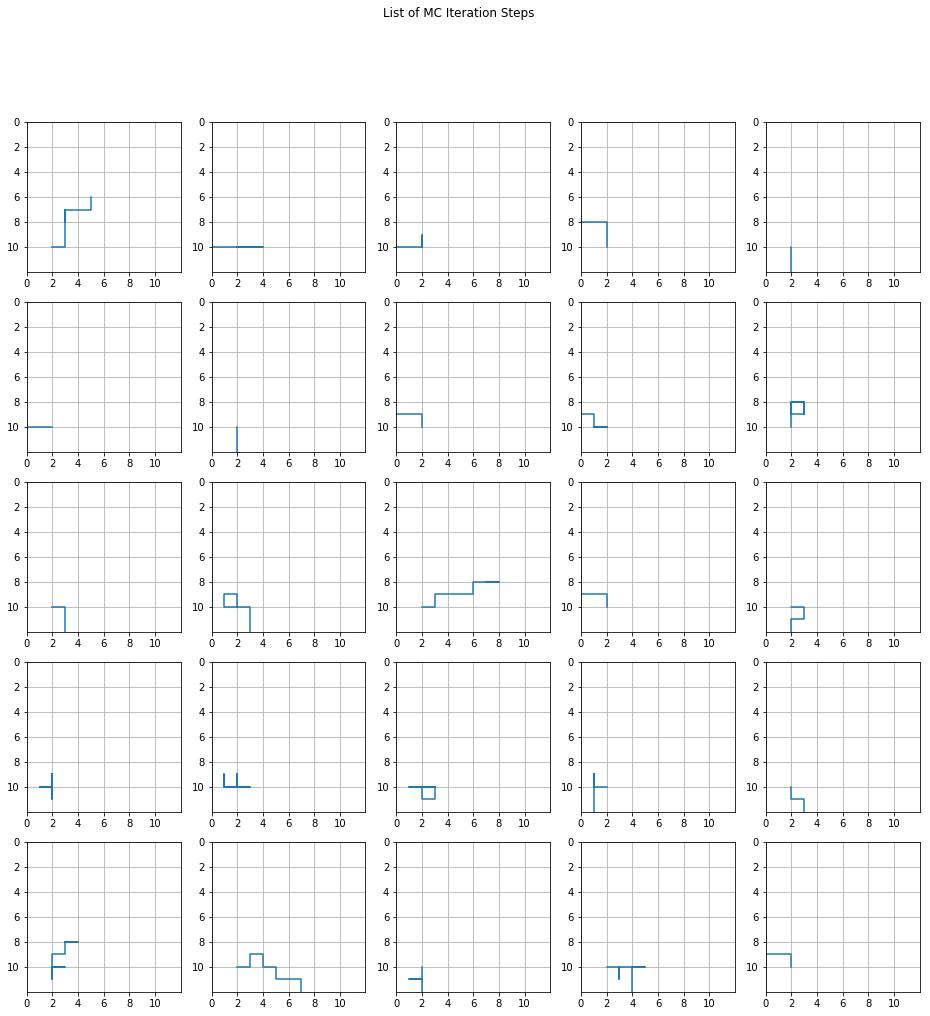

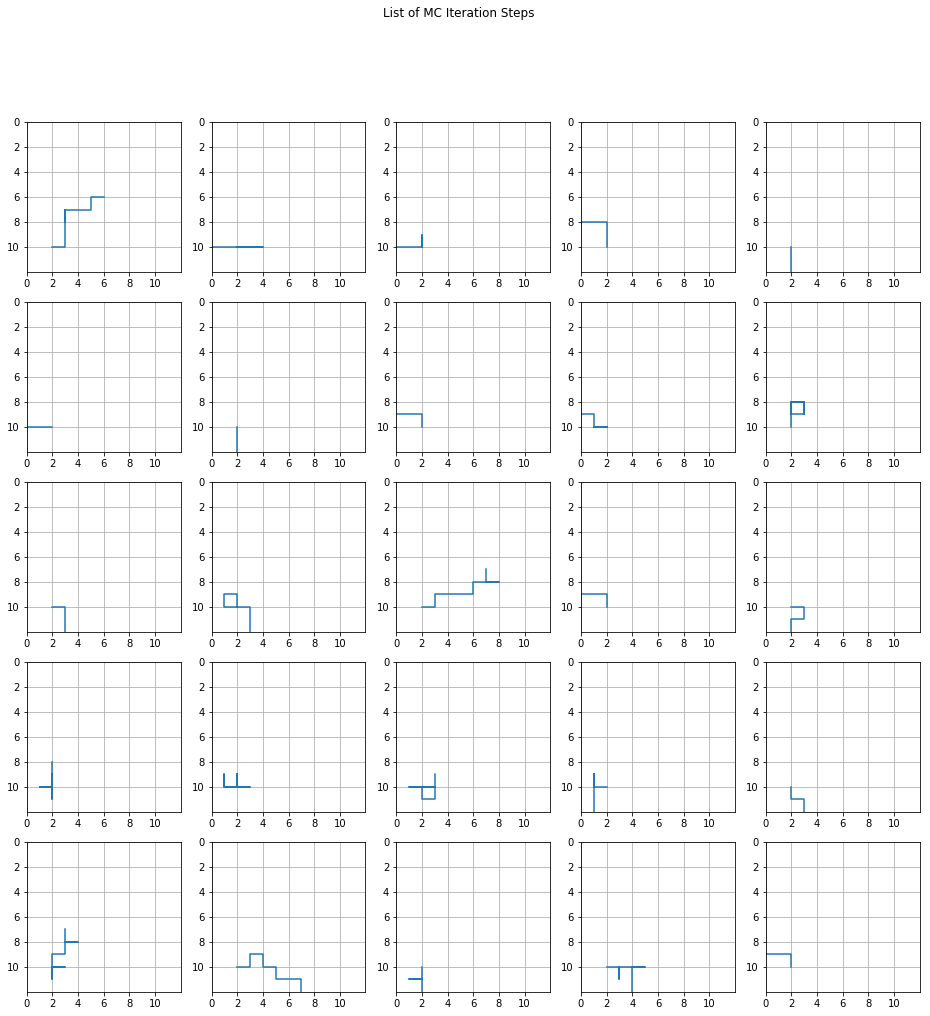

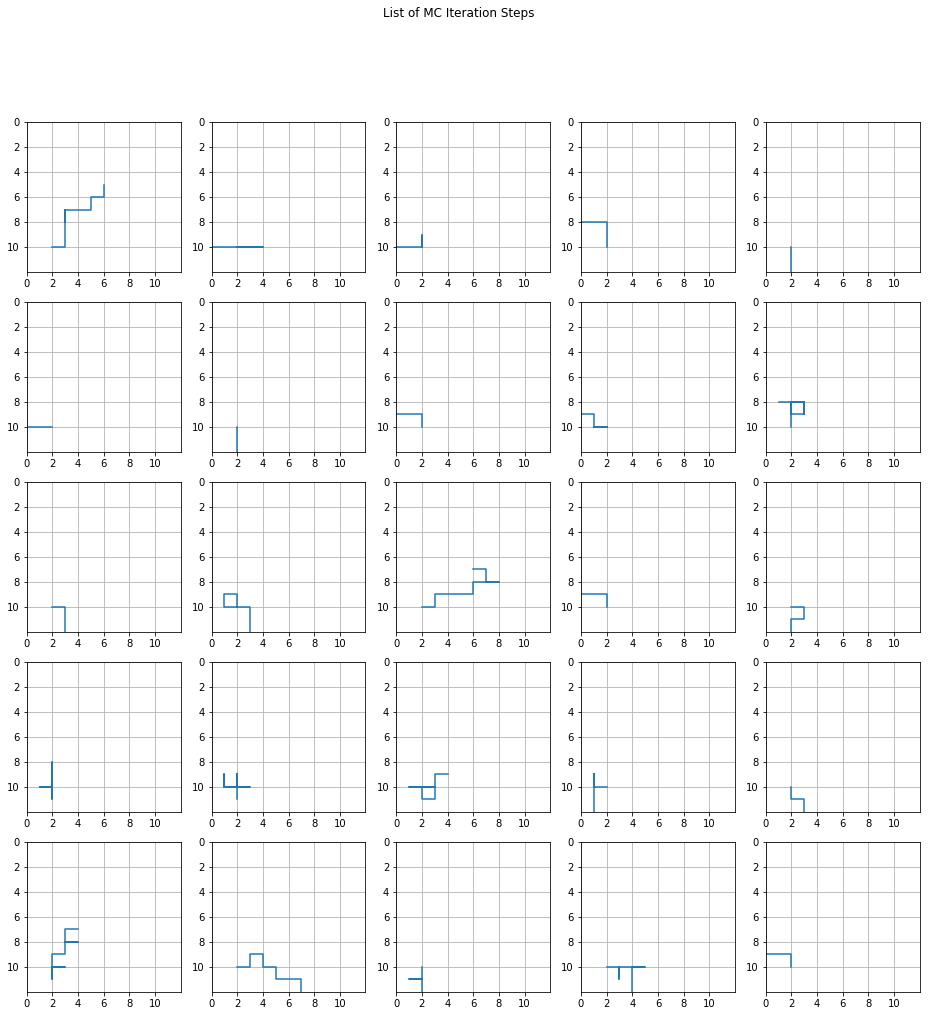

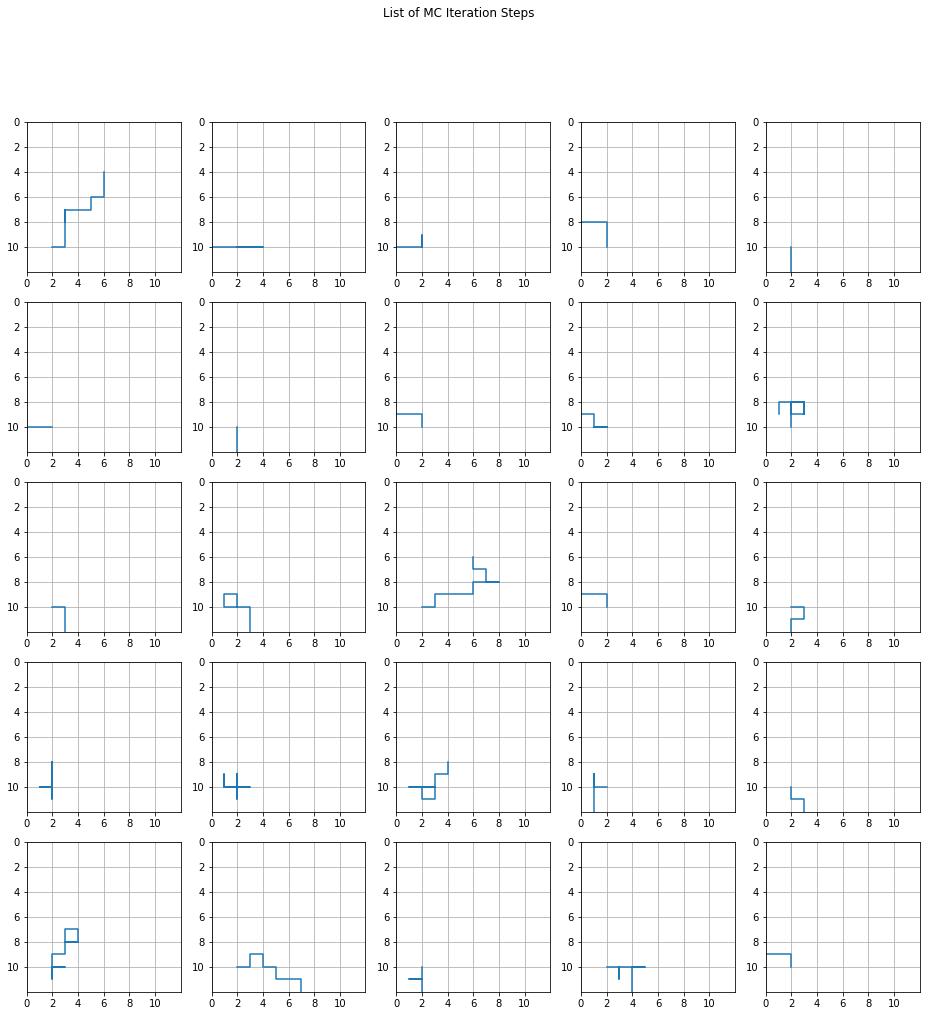

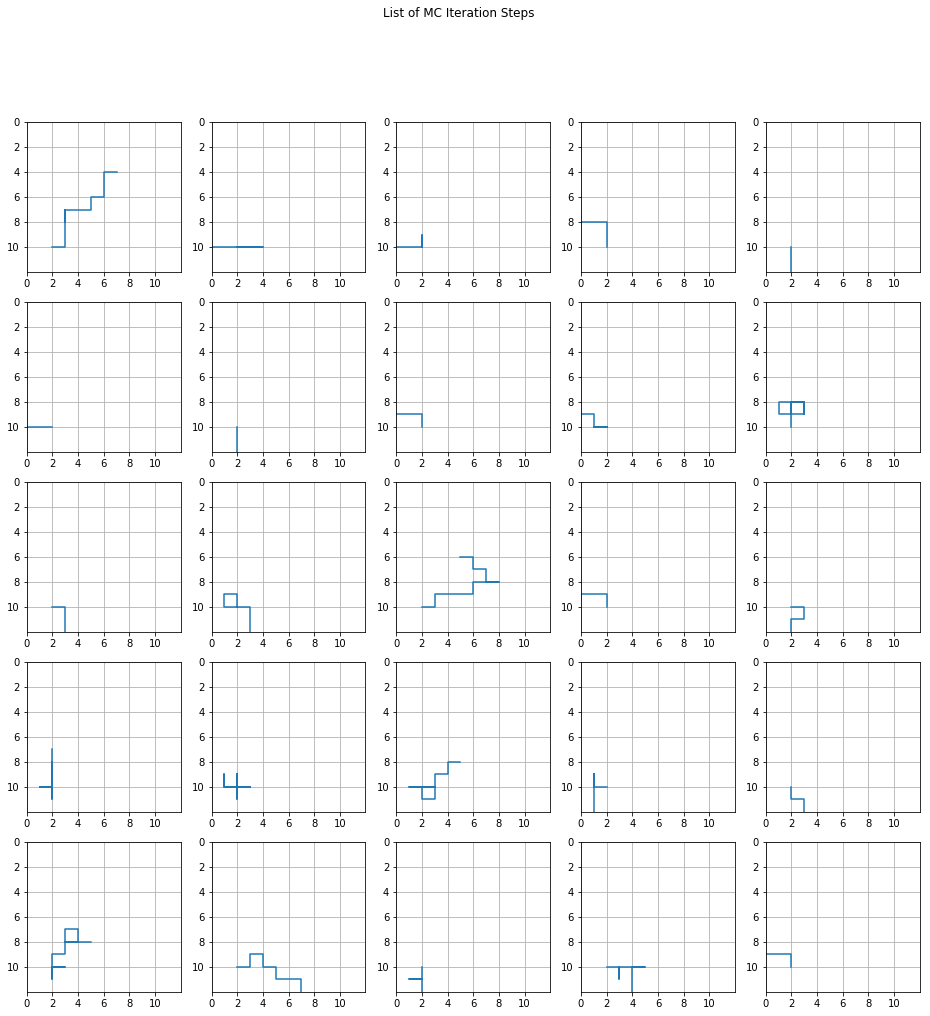

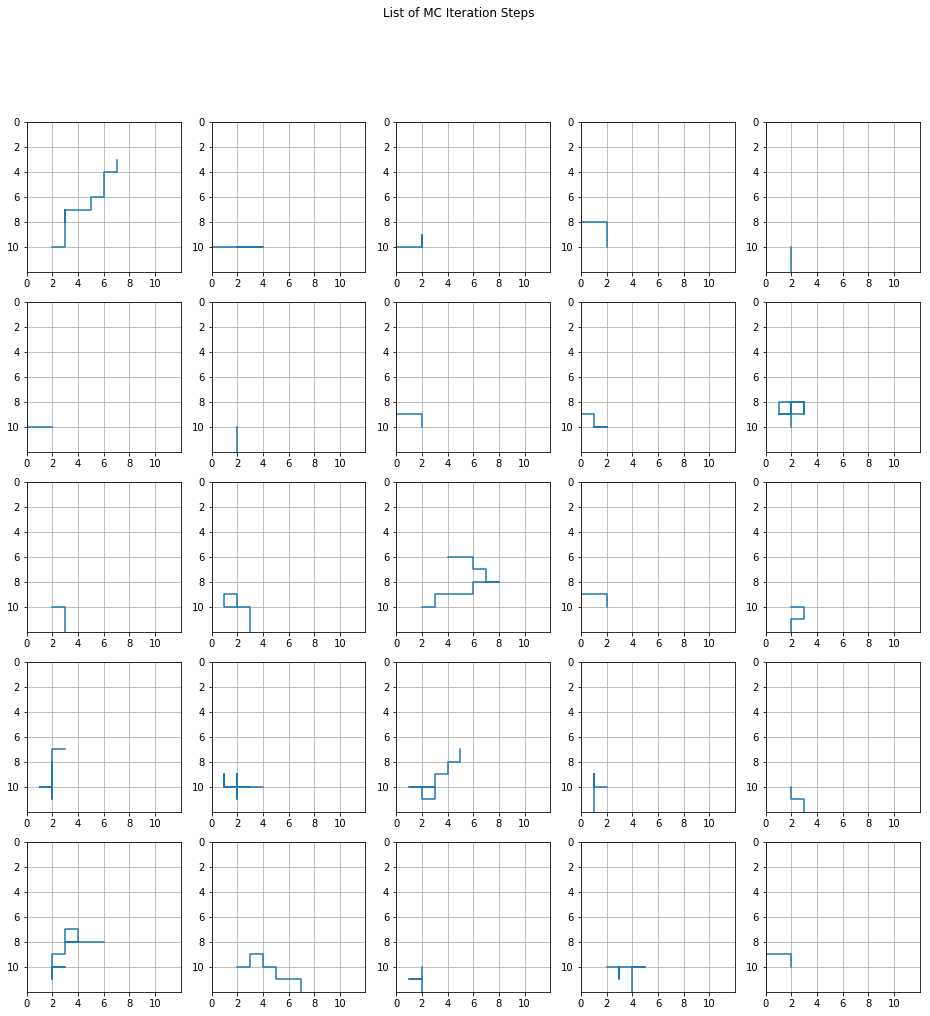

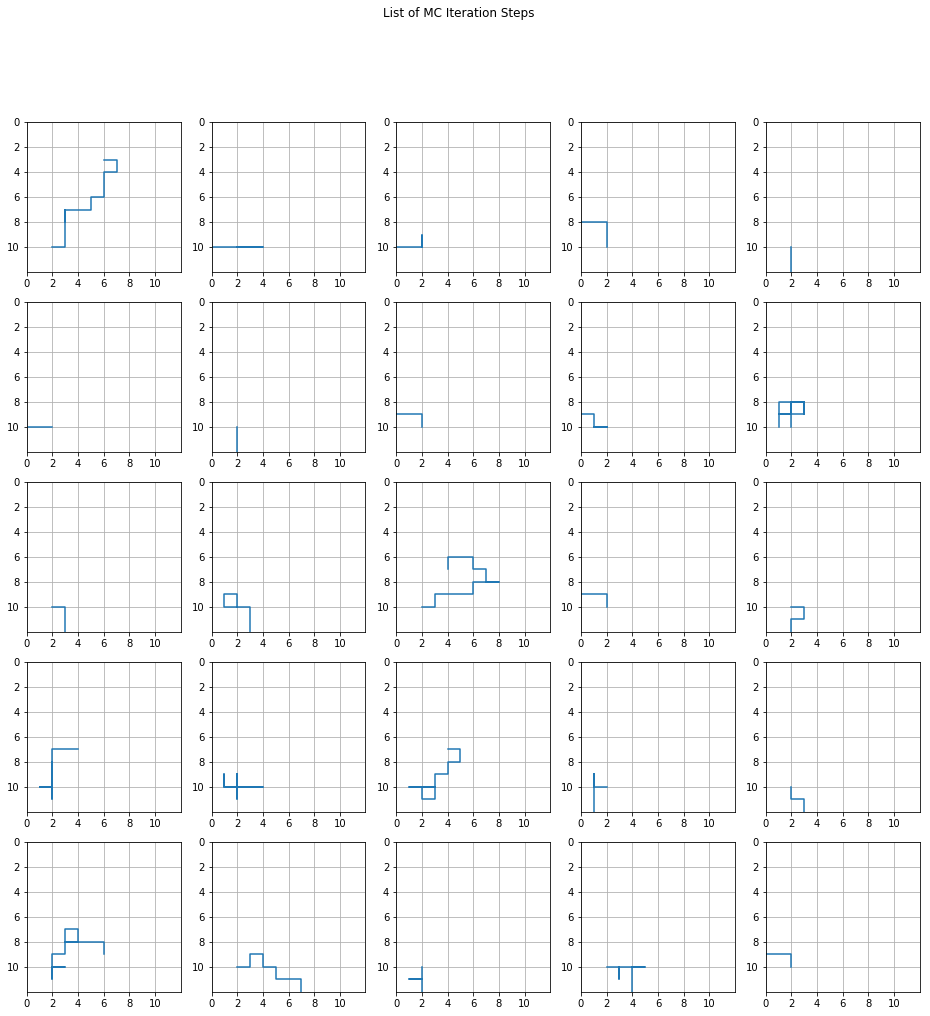

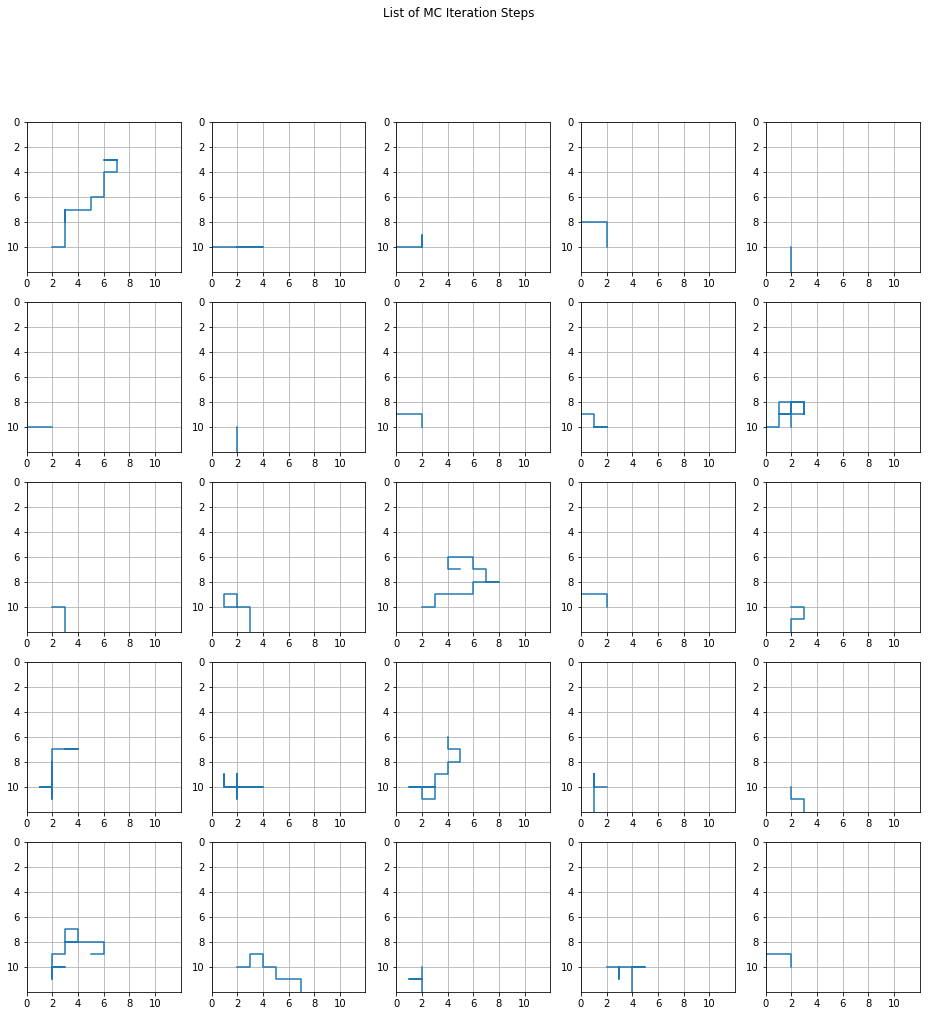

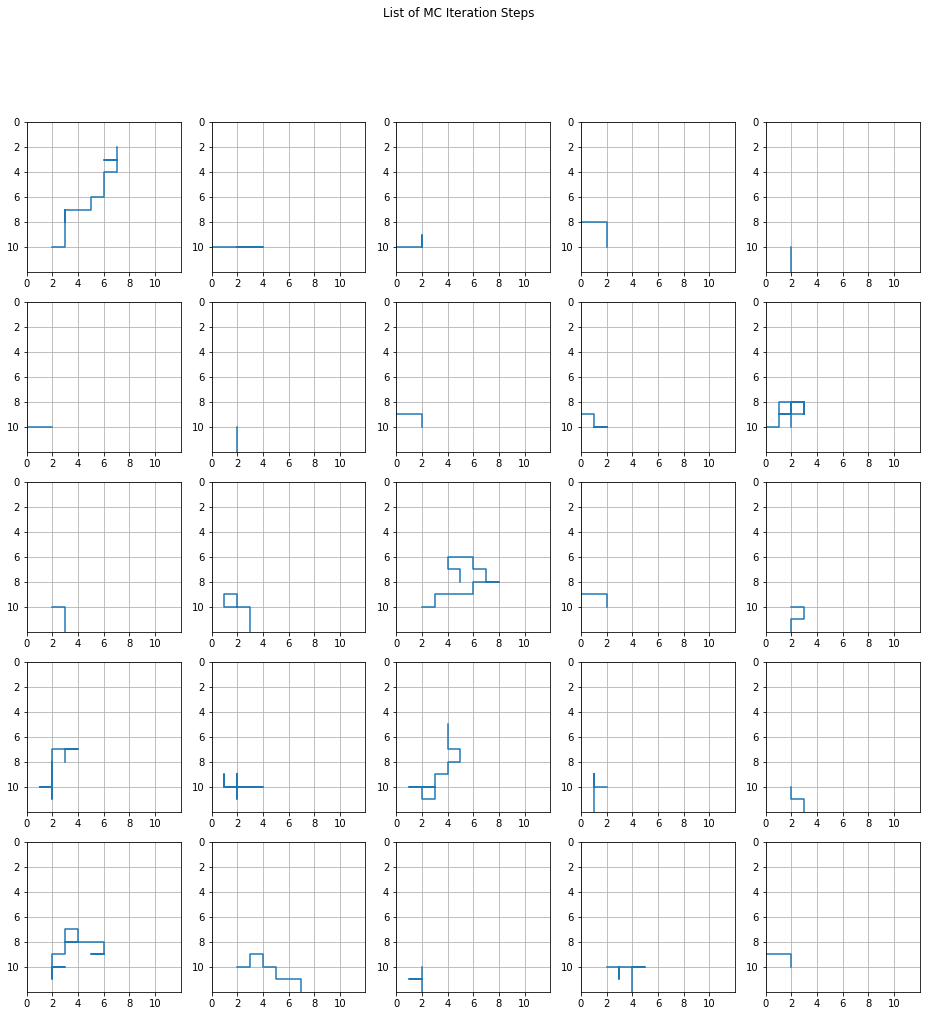

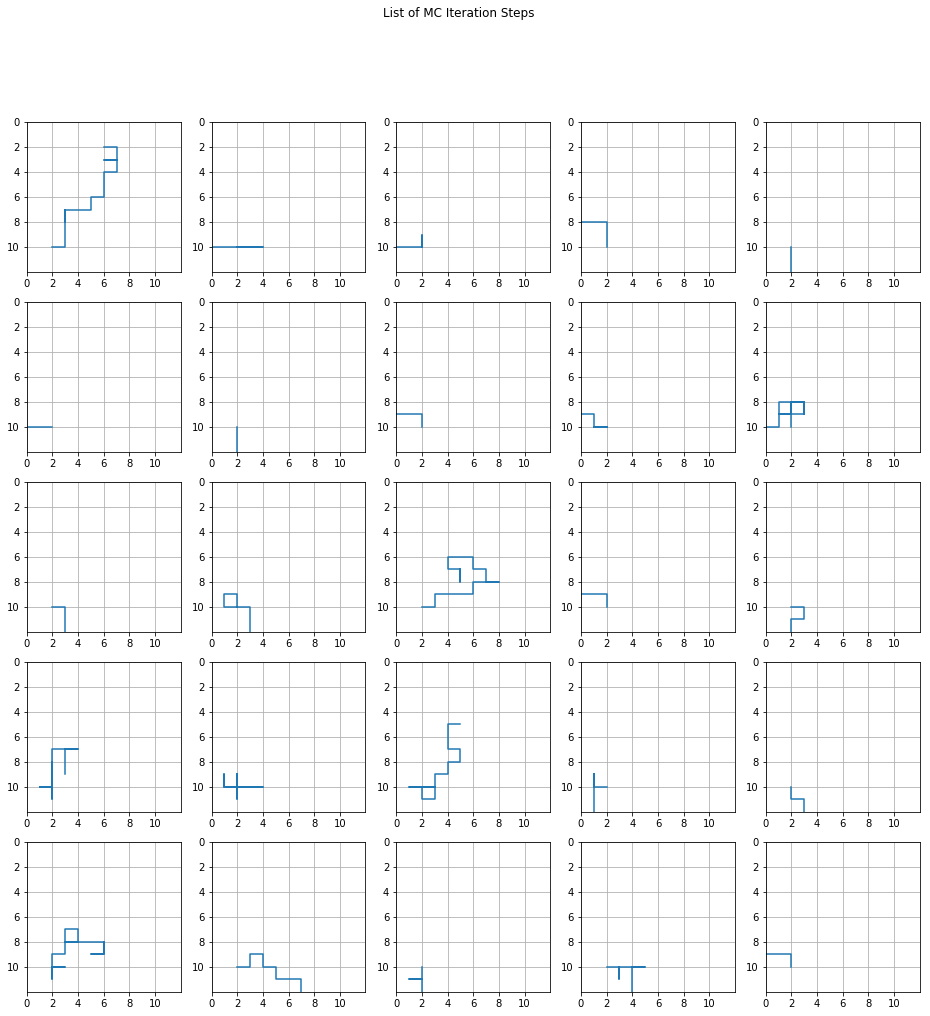

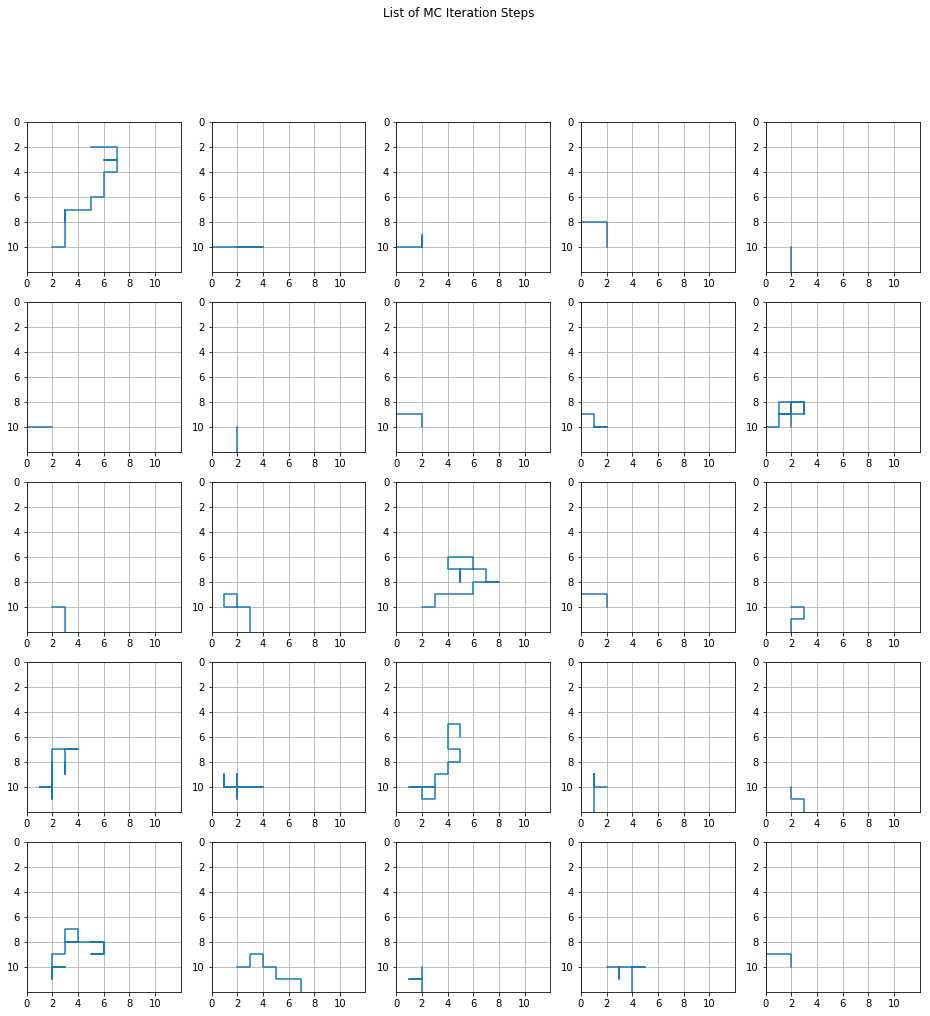

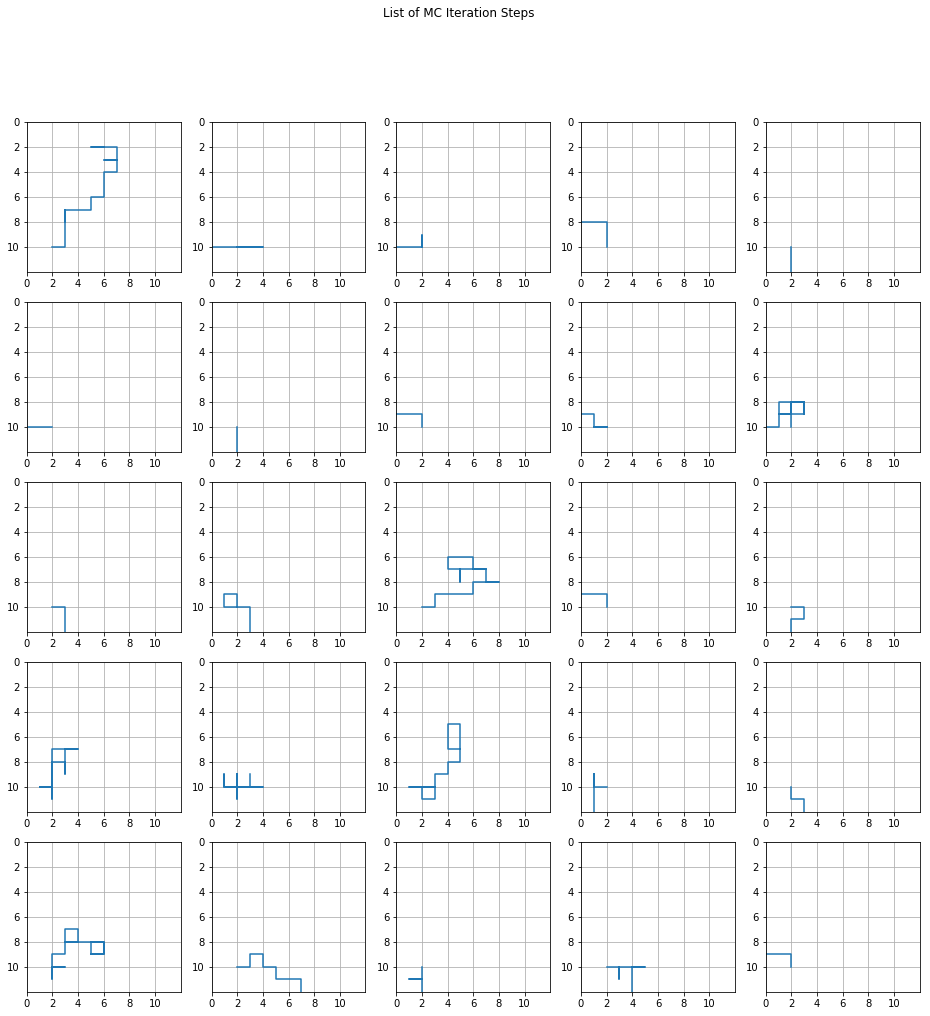

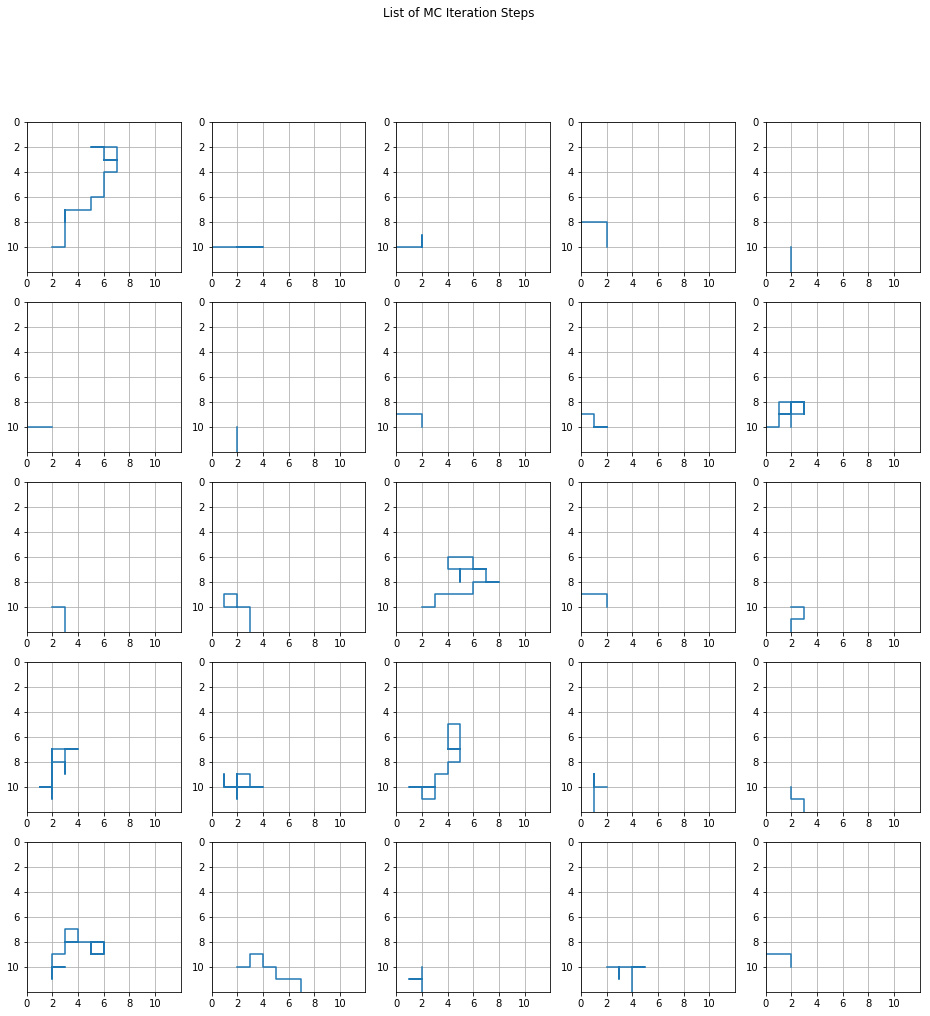

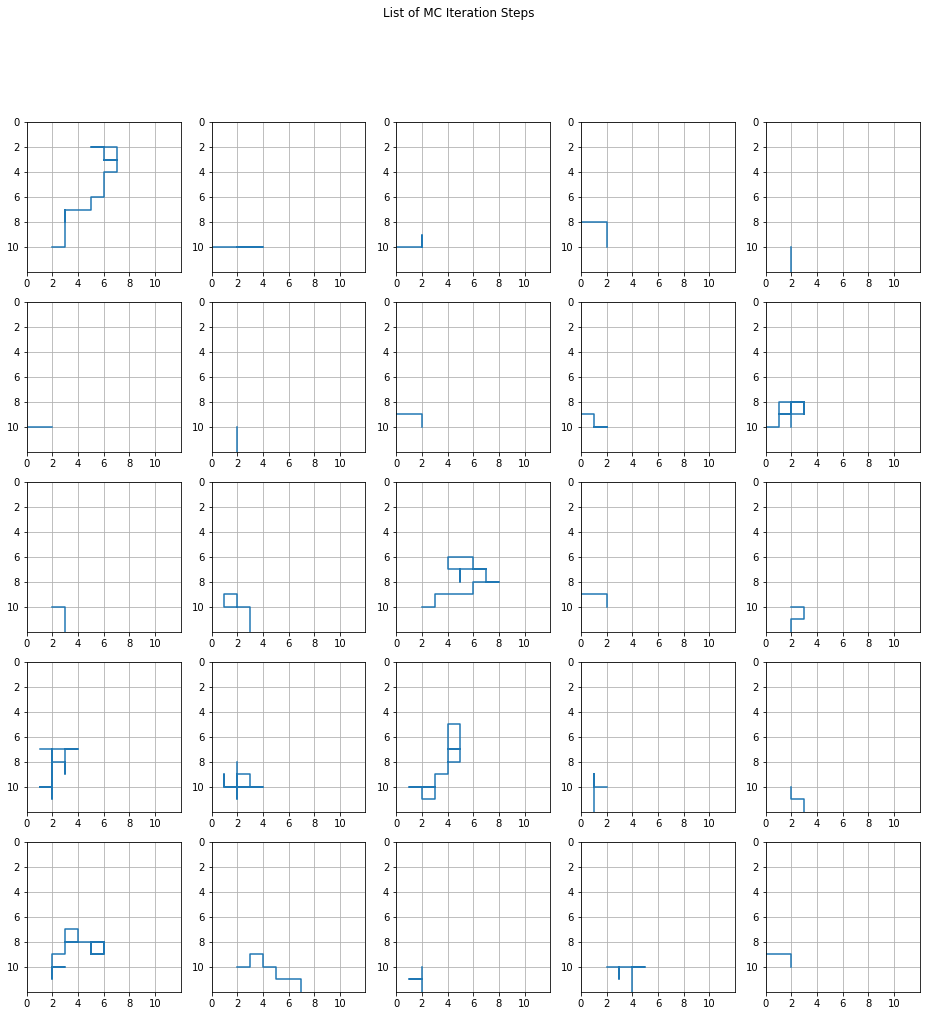

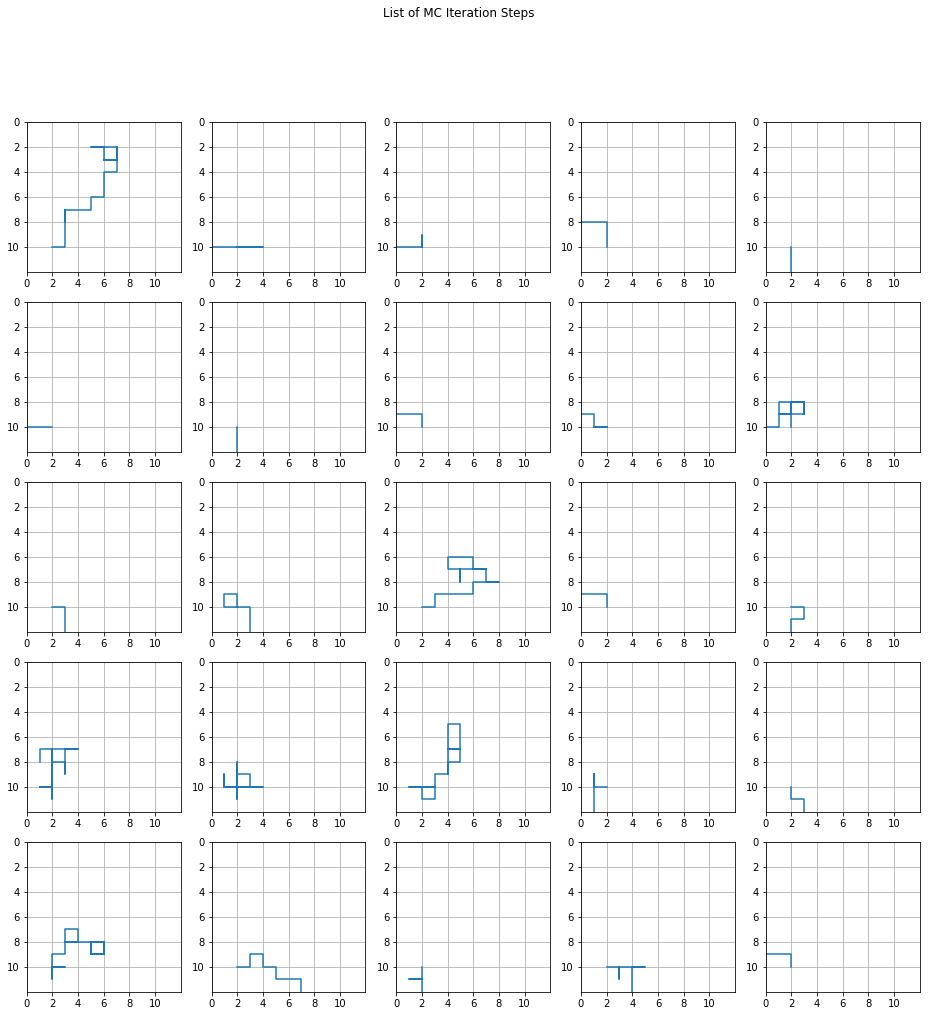

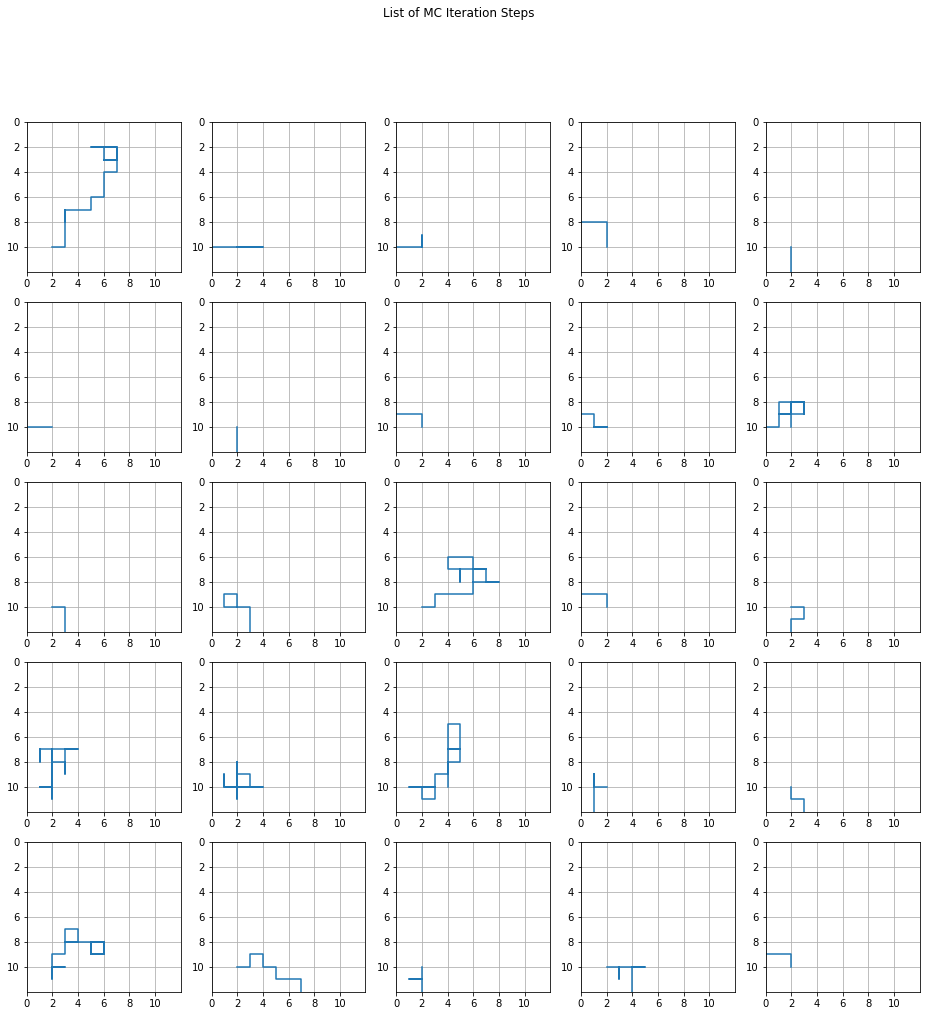

In [19]:
def graph_generator(k):
    fig, ax = plt.subplots(5,5, figsize=(16,16))
    fig.suptitle('List of MC Iteration Steps')

    for i in range(5):
        for j in range(5):
            ax[i][j].plot([X[0] for X in Xts[5*i+j][:k+1]],[X[1] for X in Xts[5*i+j][:k+1]])
            ax[i][j].set_xticks(np.arange(0,12,2))
            ax[i][j].set_yticks(np.arange(0,12,2))
            ax[i][j].set_xlim(0,12)
            ax[i][j].set_ylim(12,0)
            ax[i][j].grid()
    
    print("You have print :" + str(k+1) + " graph. You still have : " + str(24-k) + " graph more.")
    return None #plt.savefig('test' + str(k) + '.jpg')

#

for k in range(25):
    print(graph_generator(k))

You have print :0 graph. You still have : 25 graph. 
None
You have print :1 graph. You still have : 24 graph. 
None
You have print :2 graph. You still have : 23 graph. 
None
You have print :3 graph. You still have : 22 graph. 
None
You have print :4 graph. You still have : 21 graph. 
None
You have print :5 graph. You still have : 20 graph. 
None
You have print :6 graph. You still have : 19 graph. 
None
You have print :7 graph. You still have : 18 graph. 
None
You have print :8 graph. You still have : 17 graph. 
None
You have print :9 graph. You still have : 16 graph. 
None
You have print :10 graph. You still have : 15 graph. 
None
You have print :11 graph. You still have : 14 graph. 
None
You have print :12 graph. You still have : 13 graph. 
None
You have print :13 graph. You still have : 12 graph. 
None
You have print :14 graph. You still have : 11 graph. 
None
You have print :15 graph. You still have : 10 graph. 
None
You have print :16 graph. You still have : 9 graph. 
None
You have

C:\Users\daris\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


You have print :21 graph. You still have : 4 graph. 
None
You have print :22 graph. You still have : 3 graph. 
None
You have print :23 graph. You still have : 2 graph. 
None
You have print :24 graph. You still have : 1 graph. 
None


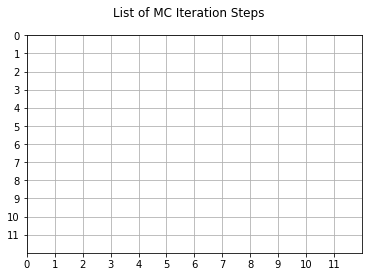

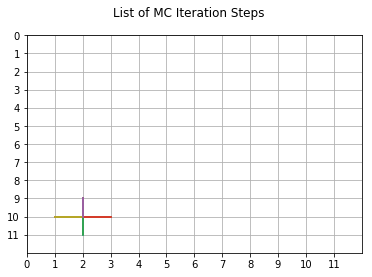

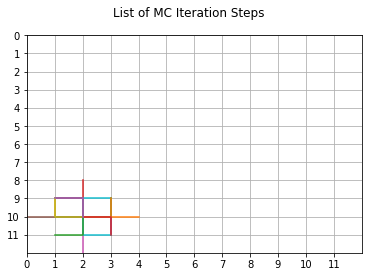

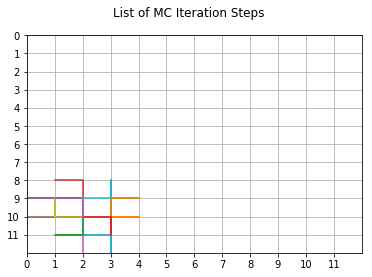

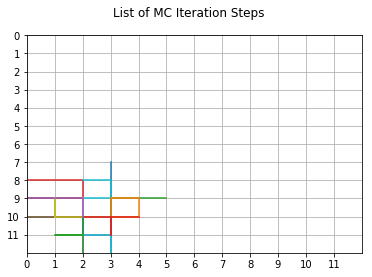

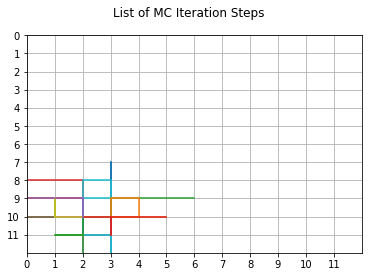

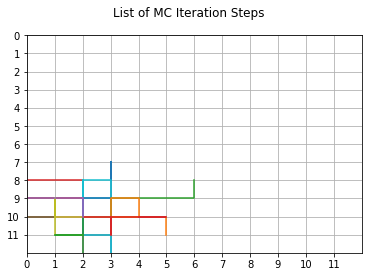

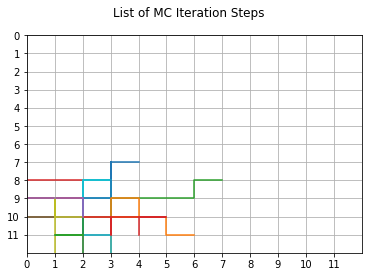

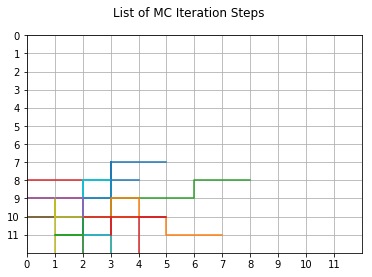

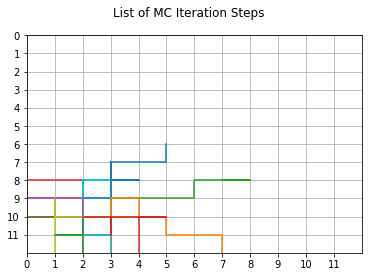

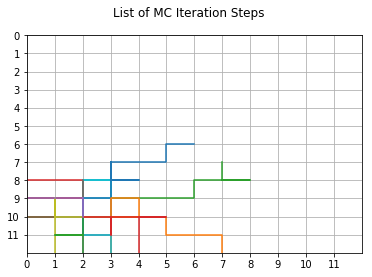

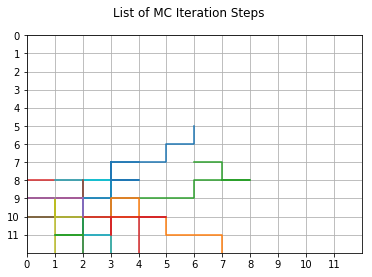

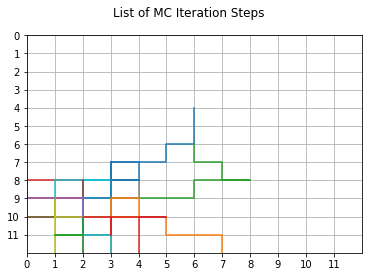

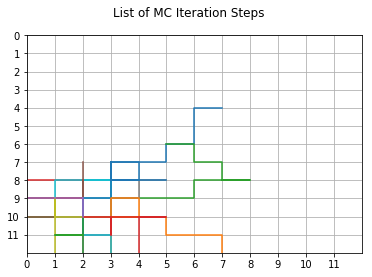

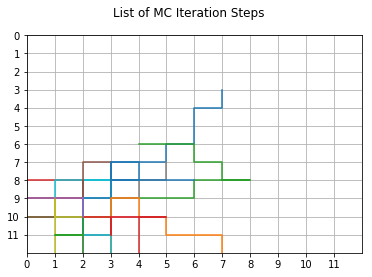

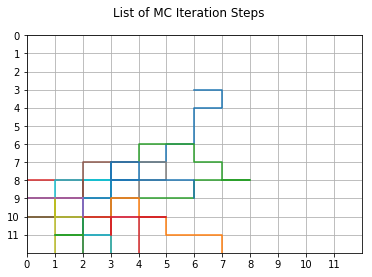

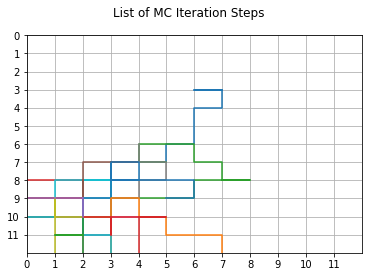

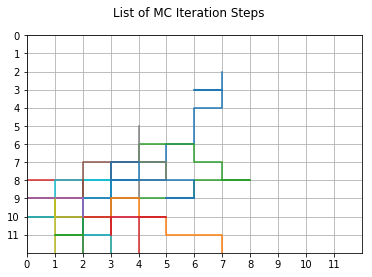

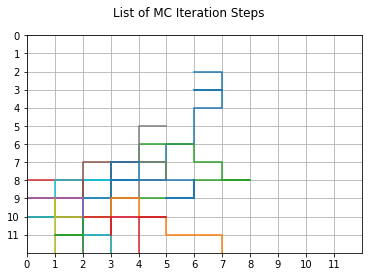

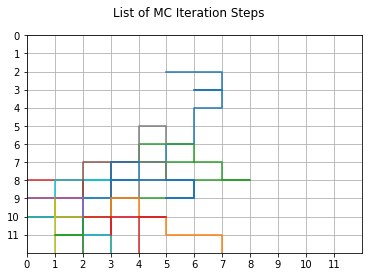

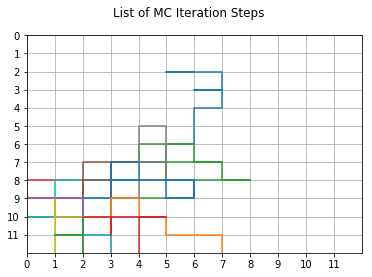

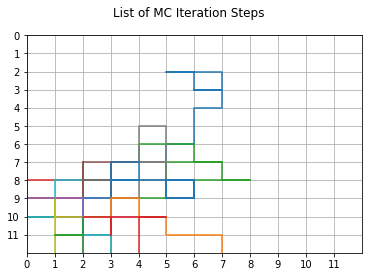

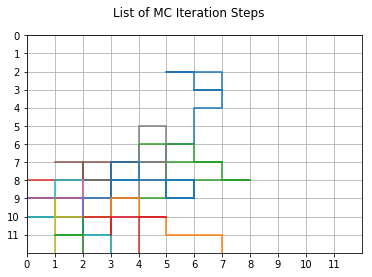

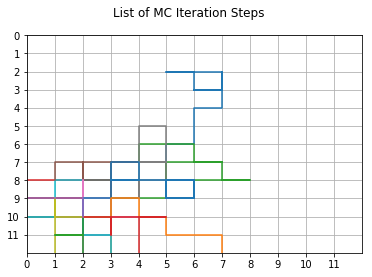

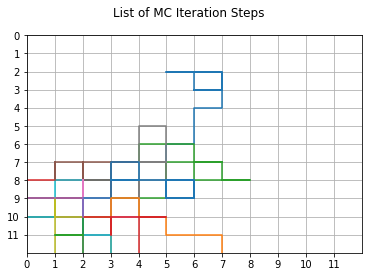

In [20]:
def graph_generator_2(k):
    fig, ax = plt.subplots()
    fig.suptitle('List of MC Iteration Steps')
    plt.xticks(np.arange(0,12,1))
    plt.yticks(np.arange(0,12,1))
    plt.xlim(0,12)
    plt.ylim(12,0)
    plt.grid()

    for i in range(25):
            plt.plot([X[0] for X in Xts[i][:k+1]],[X[1] for X in Xts[i][:k+1]])

    print("You have print :" + str(k) + " graph. You still have : " + str(25-k) + " graph. ")
    return None #plt.savefig('test' + str(k) + '-merged2.jpg')

for k in range(25):
    print(graph_generator_2(k))

## Iterative grid-based method

In [9]:
V = np.nan_to_num(box_bc)

In [10]:
V

array([[10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]],
      dtype=float32)

In [12]:
t = 2*np.cos(np.pi/12)
w = (8 - np.sqrt(64-16*t**2))/t**2

In [13]:
def residue(V, i, j):
    res = V[i-1][j]
    res += V[i+1][j]
    res += V[i][j-1]
    res += V[i][j+1]
    res = res/4 - V[i][j]
    return res

In [14]:
loop = True
itercount = 1
maxiter = 50
thres = 0
V = np.nan_to_num(box_bc)
V_bef = np.copy(V)

while loop:
    for i in range(1,V.shape[0]-1):
        for j in range(1,V.shape[1]-1):
            res = residue(V,i,j)
            V_bef = V
            V[i][j] = V[i][j] + w*res
    if np.max(abs(V-V_bef)) < thres:
        loop = False
        print('Converged at iter %d' %itercount)
    else:
        itercount += 1
        if itercount > maxiter:
            loop = False
            print('No convergence after %d iterations' %maxiter)


No convergence after 50 iterations


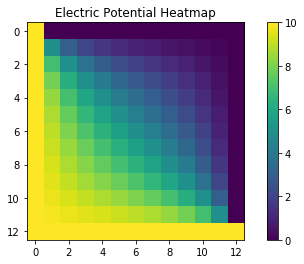

In [15]:
fig = plt.figure(figsize=(8,4))
plt.title('Electric Potential Heatmap')

box_map = plt.imshow(V.T)
plt.colorbar(box_map)

plt.show()

In [16]:
print(np.around(V.T, decimals=1))

[[10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [10.   5.   3.   2.1  1.6  1.2  1.   0.8  0.6  0.5  0.3  0.2  0. ]
 [10.   7.   5.   3.8  2.9  2.4  1.9  1.6  1.2  0.9  0.6  0.3  0. ]
 [10.   7.9  6.2  5.   4.1  3.4  2.8  2.3  1.8  1.4  0.9  0.5  0. ]
 [10.   8.4  7.1  5.9  5.   4.2  3.6  3.   2.4  1.8  1.2  0.6  0. ]
 [10.   8.8  7.6  6.6  5.8  5.   4.3  3.6  3.   2.3  1.6  0.8  0. ]
 [10.   9.   8.1  7.2  6.4  5.7  5.   4.3  3.6  2.8  1.9  1.   0. ]
 [10.   9.2  8.4  7.7  7.   6.4  5.7  5.   4.2  3.4  2.4  1.2  0. ]
 [10.   9.4  8.8  8.2  7.6  7.   6.4  5.8  5.   4.1  2.9  1.6  0. ]
 [10.   9.5  9.1  8.6  8.2  7.7  7.2  6.6  5.9  5.   3.8  2.1  0. ]
 [10.   9.7  9.4  9.1  8.8  8.4  8.1  7.6  7.1  6.2  5.   3.   0. ]
 [10.   9.8  9.7  9.5  9.4  9.2  9.   8.8  8.4  7.9  7.   5.   0. ]
 [10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10. ]]
